In [1]:
import pandas as pd

df = pd.read_csv("../data/processed_reviews.csv")

In [2]:
len(df)

864723

In [3]:
df["sentiment"].value_counts(normalize=True)

sentiment
positive    0.553487
negative    0.446513
Name: proportion, dtype: float64

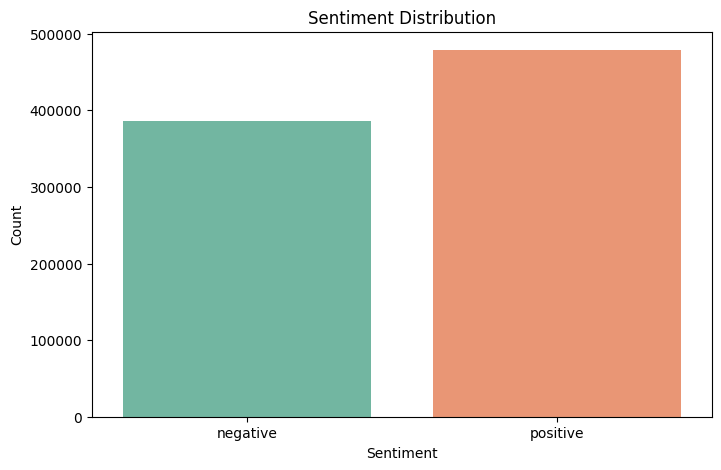

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="sentiment", hue="sentiment", palette="Set2", legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

##### Step 1: Word Frequency Analysis

In [5]:
from collections import Counter


def get_word_frequencies(df, sentiment):
    reviews = df[df["sentiment"] == sentiment]["processed_review"]
    word_list = " ".join(reviews).split()
    return Counter(word_list)


positive_word_freq = get_word_frequencies(df, "positive")
negative_word_freq = get_word_frequencies(df, "negative")

print("Most common words in positive reviews:", positive_word_freq.most_common(10))
print("Most common words in negative reviews:", negative_word_freq.most_common(10))

Most common words in positive reviews: [('staff', 196445), ('location', 193394), ('room', 180963), ('hotel', 129995), ('good', 112266), ('great', 105541), ('breakfast', 86316), ('friendly', 85273), ('helpful', 76102), ('nice', 69383)]
Most common words in negative reviews: [('room', 210624), ('hotel', 80322), ('breakfast', 59156), ('small', 49843), ('staff', 39934), ('nothing', 38758), ('bed', 37383), ('would', 32265), ('could', 32046), ('one', 28942)]


##### Step 2: Review Length Analysis

In [6]:
df["review_length"] = df["processed_review"].apply(len)
df["sentiment_label"] = df["sentiment"].apply(lambda x: 1 if x == "positive" else 0)

correlation = df[["review_length", "sentiment_label"]].corr()
print("Correlation between review length and sentiment:\n", correlation)

Correlation between review length and sentiment:
                  review_length  sentiment_label
review_length         1.000000        -0.026594
sentiment_label      -0.026594         1.000000


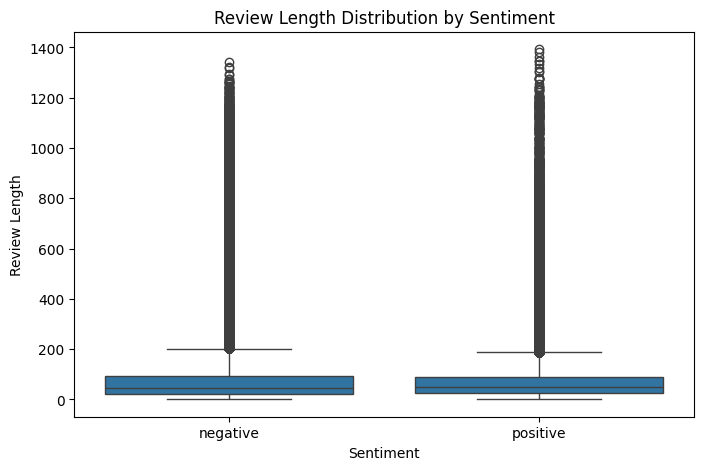

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="sentiment", y="review_length")
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.show()

##### Step 3: Additional Visualization (Word Cloud)

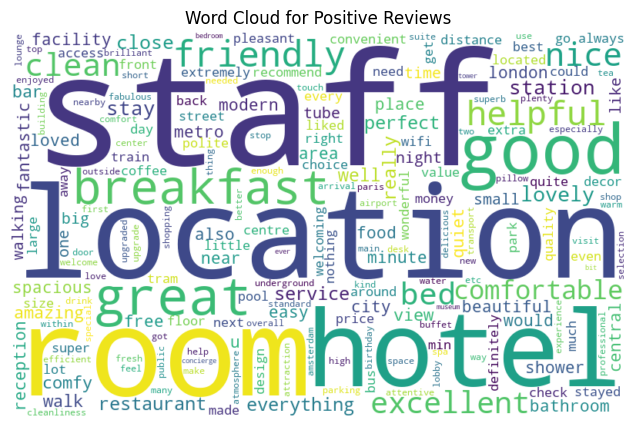

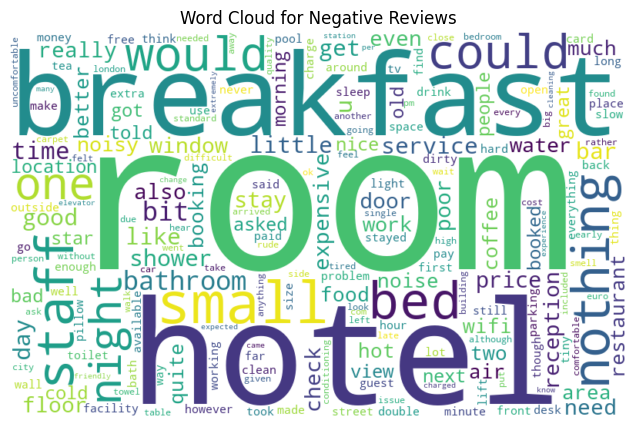

In [8]:
from wordcloud import WordCloud


def generate_wordcloud(words, title):
    wordcloud = WordCloud(
        width=800, height=500, background_color="white"
    ).generate_from_frequencies(words)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()


generate_wordcloud(positive_word_freq, "Word Cloud for Positive Reviews")
generate_wordcloud(negative_word_freq, "Word Cloud for Negative Reviews")